In [1]:
# python -m ipykernel install --user --name=dl_work_mod
import numpy as np
import pandas as pd
import time
import os
import tensorflow as tf
tf.config.run_functions_eagerly(False)
from VaDER.vader import VADER
from sklearn import preprocessing

save_path = os.path.join('test_vader', 'vader.ckpt')

np.random.seed(123)

In [2]:
from sklearn import preprocessing

X = np.load(r'C:\Projects\TAU\DL-Workshop\Git Folder\DL-WORKSHOP\npy_files\features_Asaf.npy')
y = np.load(r'C:\Projects\TAU\DL-Workshop\Git Folder\DL-WORKSHOP\npy_files\labels_Asaf.npy')
le = preprocessing.LabelEncoder()
labs = le.fit_transform(y)
print(len(X),len(y))
X_train, y_train = X, labs

1862 1862


In [3]:
pd.Series(y).value_counts()

1    549
3    544
2    413
4    356
dtype: int64

In [4]:
# normalize (better for fitting)
for i in np.arange(X_train.shape[2]):
    X_train[:,:,i] = (X_train[:,:,i] - np.mean(X_train[:,:,i])) / np.std(X_train[:,:,i])

In [5]:
vader = VADER(X_train=X_train, W_train=None, save_path=save_path, n_hidden=[64,32,16], k=3,
              learning_rate=1e-3, output_activation=None, recurrent=True, cell_type="GRU", batch_size=64)
# pre-train without latent loss
start = time.time()
vader.pre_fit(n_epoch=50, verbose=True)
# train with latent loss
vader.fit(n_epoch=50, verbose=True)
end = time.time()
print("Elapsed: ", end - start)

INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


-1 tot_loss: 85.97 	rec_loss: 64.16 	lat_loss: 21.82
1 tot_loss: 49.72 	rec_loss: 49.72 	lat_loss: 17.24
2 tot_loss: 47.00 	rec_loss: 47.00 	lat_loss: 95.41
3 tot_loss: 34.44 	rec_loss: 34.44 	lat_loss: 37.86
4 tot_loss: 25.41 	rec_loss: 25.41 	lat_loss: 83.01
5 tot_loss: 17.75 	rec_loss: 17.75 	lat_loss: 84.06
6 tot_loss: 13.85 	rec_loss: 13.85 	lat_loss: 95.04
7 tot_loss: 12.98 	rec_loss: 12.98 	lat_loss: 95.71
8 tot_loss: 12.32 	rec_loss: 12.32 	lat_loss: 105.92
9 tot_loss: 11.52 	rec_loss: 11.52 	lat_loss: 105.98
10 tot_loss: 11.66 	rec_loss: 11.66 	lat_loss: 106.32
11 tot_loss: 10.69 	rec_loss: 10.69 	lat_loss: 105.87
12 tot_loss: 10.49 	rec_loss: 10.49 	lat_loss: 98.92
13 tot_loss: 10.76 	rec_loss: 10.76 	lat_loss: 106.65
14 tot_loss: 10.61 	rec_loss: 10.61 	lat_loss: 109.45
15 tot_loss: 10.83 	rec_loss: 10.83 	lat_loss: 112.72
16 tot_loss: 10.56 	rec_loss: 10.56 	lat_loss: 113.27
17 tot_loss: 11.14 	rec_loss: 11.14 	lat_loss: 106.08
18 tot_loss: 10.01 	rec_loss: 10.01 	lat_loss:

INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


-1 tot_loss: 6.17 	rec_loss: 6.17 	lat_loss: 165.71


c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("PartitionedCall_3:4", shape=(384,), dtype=int32), values=Tensor("PartitionedCall_3:3", shape=(384, 16), dtype=float32), dense_shape=Tensor("PartitionedCall_3:5", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\tensorflow\python\framework\indexed_slices.py:448: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("PartitionedCall_3:1", shape=(192,), dtype=int32), values=Tensor("PartitionedCall_3:0", shape=(192, 16), dtype=float32), dense_shape=Tensor("PartitionedCall_3:2", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  warnings.warn(
c:\Projects\TAU\DL-Workshop\Git 

51 tot_loss: 26.27 	rec_loss: 16.17 	lat_loss: 10.10
52 tot_loss: 18.99 	rec_loss: 10.73 	lat_loss: 8.27
53 tot_loss: 18.12 	rec_loss: 10.43 	lat_loss: 7.69
54 tot_loss: 17.79 	rec_loss: 10.45 	lat_loss: 7.34
55 tot_loss: 17.52 	rec_loss: 10.68 	lat_loss: 6.84
56 tot_loss: 17.26 	rec_loss: 10.62 	lat_loss: 6.65
57 tot_loss: 17.07 	rec_loss: 10.46 	lat_loss: 6.61
58 tot_loss: 17.13 	rec_loss: 10.82 	lat_loss: 6.31
59 tot_loss: 17.08 	rec_loss: 10.89 	lat_loss: 6.19
60 tot_loss: 16.82 	rec_loss: 10.13 	lat_loss: 6.69
61 tot_loss: 16.08 	rec_loss: 9.67 	lat_loss: 6.40
62 tot_loss: 16.52 	rec_loss: 10.05 	lat_loss: 6.48
63 tot_loss: 16.33 	rec_loss: 9.93 	lat_loss: 6.40
64 tot_loss: 15.89 	rec_loss: 9.81 	lat_loss: 6.08
65 tot_loss: 16.19 	rec_loss: 9.86 	lat_loss: 6.33
66 tot_loss: 15.65 	rec_loss: 9.73 	lat_loss: 5.93
67 tot_loss: 15.17 	rec_loss: 9.21 	lat_loss: 5.96
68 tot_loss: 15.18 	rec_loss: 9.24 	lat_loss: 5.94
69 tot_loss: 14.57 	rec_loss: 8.90 	lat_loss: 5.67
70 tot_loss: 15.37 

INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


INFO:tensorflow:Assets written to: test_vader\vader.ckpt\assets


Elapsed:  62.975239992141724


In [6]:
# get the clusters
c = vader.cluster(X_train)
# get the re-constructions
p = vader.predict(X_train)
# compute the loss given the network
l = vader.get_loss(X_train)

In [7]:
print(pd.Series(c).value_counts())

2    1318
0     343
1     201
dtype: int64


In [8]:
latent = vader.map_to_latent(X_train)

In [9]:
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
import numpy as np
from random import randint
import os
import matplotlib.pyplot as plt

def plot_clustering_matplotlib(z_run, labels):

    labels = labels[:z_run.shape[0]] # because of weird batch_size

    hex_colors = []
    for _ in np.unique(labels):
        hex_colors.append('#%06X' % randint(0, 0xFFFFFF))

    colors = [hex_colors[int(i)] for i in labels]

    z_run_pca = TruncatedSVD(n_components=2).fit_transform(z_run)
    z_run_tsne = TSNE(perplexity=80, min_grad_norm=1E-12, n_iter=3000).fit_transform(z_run)

    plt.scatter(z_run_pca[:, 0], z_run_pca[:, 1], c=colors, marker='*', linewidths=0)
    plt.title('PCA on z_run')
    plt.show()

    plt.scatter(z_run_tsne[:, 0], z_run_tsne[:, 1], c=colors, marker='*', linewidths=0)
    plt.title('tSNE on z_run')
    plt.show()

c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
c:\Projects\TAU\DL-Workshop\Git Folder\Env\dl_work_mod\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


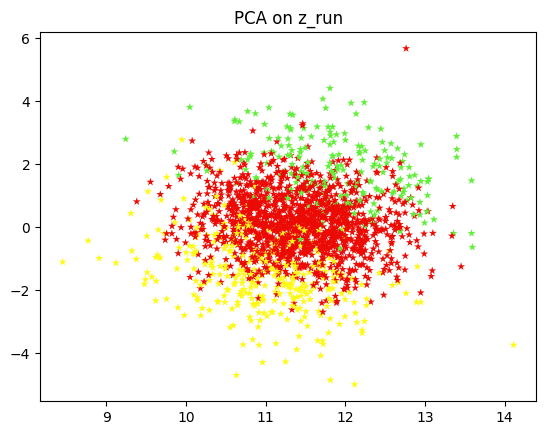

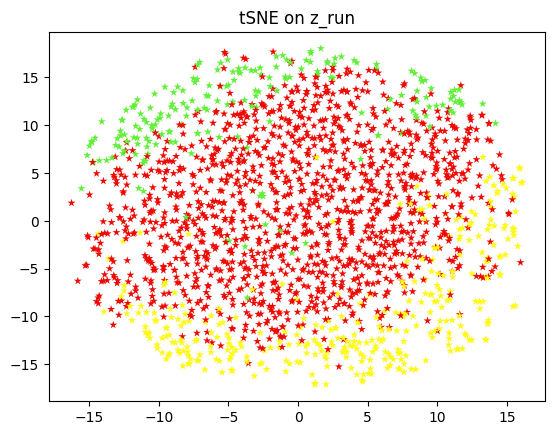

In [10]:
plot_clustering_matplotlib(latent,c)

In [ ]:
import umap

mapper = umap.UMAP().fit(pendigits.data)
